Les arbres de décision sont des algorithmes de machine learning pouvant être utilisés pour : 
- **Un problème de régression** où la variable à prédire est quantitative (pour prédire par exemple le prix d'une maison)
- **Un problème de classification** où la variable à prédire est qualitative (prédire le spam d'un e-mail)

*Note : Ces algorithmes sont **non-linéaires** et **non paramétrique**.*

Le principe général consiste, **sur plusieurs itération**, à **diviser les individus** en $k$ classes les plus homogènes possibles à partir d'une **métrique choisie** jusqu'à que cela ne soit plus possible.

- On appelle les divisions **« nœuds »** de l'arbre. Ils indiquent l’appartenance à une classe. 

- Lorsque la séparation n'est plus possible on obtient **les « feuilles »** de l’arbre. Elles indiquent la prédiction selon toutes les règles établies par les noeuds précédents.

*Note : Il est possible de contrôler le critère d'arrêt, crucial en pratique, car il permet d'éviter le surapprentissage.*

# Arbre de Decision : Classifieur

On trouve plusieurs types d'arbres de décision pour un problème de classification : 
- La méthode **CART** avec comme métrique l'indice de Gini 
- La méthode **C4.5** qui se base sur le gain d'information à partir de la diminution d'entropie 
- La méthode **CHAID** utilisant la métrique du χ$^2$

 > On utilisera le jeu de données *iris* pour implémenter le classifieur

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [58]:
iris = load_iris()

X = iris.data
y = iris.target

In [59]:
X = pd.DataFrame(X, columns=iris.feature_names)
y = pd.Series(y, name="y")

## CART

**CART** (abréviation de *Classification And Régression Trees*). Cet algorithme consiste de partir de la racine de l'arbre et de trouver le meilleur split successivement pour chaque embranchement (chaque noeud est construit de manière à minimiser l'impureté de Gini).

Lors du parcours de chaque noeud :

- si une **caractéristique est inférieure à un seuil**, nous allons à gauche, sinon nous allons à droite.
- chaque **feuille est associée à une classe**, qui est la prédiction du modèle.

La récursivité s'arrête lorsque la profondeur maximale est atteinte, c'est à dire quand plus aucune séparation n'est possible de manière plus pure que le noeud parent. 

Il faut noter que pour cet algorithme, seulement deux branches à chaque noeud sont possibles (il s'agit d'un *split* binaire systématiquement).

### Métrique de split : l'indice de Gini

La méthode CART utilise le concept **d'impureté de Gini** pour décrire à quel point un noeud est *homogène* ou *pur*. 

Un noeud est dit pur $(G = 0)$ si toutes ses observations appartiennent à la même classe, tandis qu'un noeud avec de nombreuses observations de classes différentes aura un Gini proche de 1.

On défini **l'impureté Gini** de $n$ échantillons répartis en $k$ classes par :

$$G = 1 - \sum_{k=1}^{c}{\left(\frac{s_{k}}{s} \right)^2}$$

où : 
- $s$ correspond à l'échantillon total
- $s_k$ correspond à la part de l'échantillon appartenant à la classe $k$

>On peut par exemple calculer l'indice de Gini sur des données du Dataset *iris*, pour le premier noeud parent

In [5]:
def _gini(y):
    n = y.size
    return 1 - sum((np.sum(y == c) / n) ** 2 for c in np.unique(y))

In [6]:
_gini(y)

0.6666666666666667

> On peut ensuite vérifier ensuite avec le modèle de sklearn sur les mêmes données

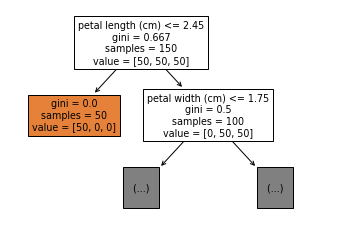

In [7]:
clf = DecisionTreeClassifier().fit(
    X,y)

plot_tree(clf, 
          feature_names=iris.feature_names,
          filled=True, max_depth=1);

### Embranchements 

L'objectif de l'algorithme CART est donc de trouver **la variable et le seuil optimal** pour que l'impureté de Gini soit minimisée pour trouver le noeud fils.

#### Threshold



Dans une première étape : **il faut calculer l'indice de Gini pour toutes les divisions (seuils ou *thresholds* possibles) pour une variable donnée**. 

- Pour le cas d'une variable expliquée prenant des valeurs **binaire**, il faut juster compter le nombre de modalité pour le split de cette variable (on place le split à la valeur $0.5$), il n'y a donc qu'un seuil.

- Pour une valeur **continue** ou **catégorielle ordinale**, il faut au préalable trier les valeurs et utiliser comme seuil tous les points moyens entre deux valeurs adjacentes uniques.

> On considère une variable du jeu de données et on récupère toutes les valeurs possibles

In [14]:
t = X["petal length (cm)"].unique()
t

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

> On trie la liste et on applique la moyenne pour chaque observation deux à deux (sans oublier de retirer la dernière valeur pour éviter de retourner une erreur)

In [15]:
def __make_threshold(liste):
    if len(liste) > 1:
        liste_sorted = sorted(liste)
        return np.array([np.mean((liste_sorted[i], liste_sorted[i+1]))
                         for i in range(len(liste_sorted))[:-1]])
    else:
        return np.array(liste)

In [16]:
__make_threshold(t)

array([1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.8 , 2.45, 3.15, 3.4 ,
       3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15, 4.25, 4.35, 4.45, 4.55,
       4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55, 5.65,
       5.75, 5.85, 5.95, 6.05, 6.2 , 6.35, 6.5 , 6.65, 6.8 ])

#### Gini pondéré

Après avoir trouver l'ensemble des seuils possibles pour une variable quantitative (c'est aussi le cas pour une variable qualitative ordinale) il faut maintenant selectionner le meilleur seuil qui minimise **l'indice de Gini pondéré** (entre les deux Gini de chaque embranchement). 

Dans une première étape, il faut calculer l'indice de Gini pour le **noeud fils de gauche et de droite**.

Pour le noeud de gauche : 

- $i$ : désigne le nombre d'observations répondant vraie au seuil de la variable
- $s_k^{i}$ : désigne le nombre d'observation répondant au seuil de la variable choisit et à la modalité $k$

$$G^{left}_i = 1 - \sum_{k=1}^{n}{\left(\frac{s_{k}^{i}}{i} \right)^2}$$

De manière symétrique pour le noeud de droite : 

$$G^{right}_i = 1 - \sum_{k=1}^{n}{\left(\frac{s_{k}^{i-}}{i-} \right)^2}$$

*Note : $i-$ correspond à l'inverse du seuil, donc les modalités fausses* 

Dans une deuxième étape il faut maintenant calculer **le gini pondéré** entre les deux noeuds fils pour connaitre le gini de cet embranchement.

$$G_n =  \frac{i}{s} \; G^{left}_i + \frac{i-}{s} \; G^{right}_i $$

> On prend une des variable du jeu de données iris et on calcule l'indice de Gini fils optimal pour chacun des seuils possibles. On peut fixer un seuil arbitraire pour commencer.

In [17]:
def gini_node_child(X, y, var, threshold):
    classe = X[var] < threshold

    m = len(y)
    number_left = sum(classe)
    number_right = sum(~classe)

    gini_left = 1.0 - sum((sum(classe[y == i]) / number_left) ** 2
                          for i in np.unique(y))
    gini_right = 1.0 - sum((sum(~classe[y == i]) / number_right) ** 2
                           for i in np.unique(y))

    gini_pondere = (number_left * gini_left + number_right * gini_right) / m
    return gini_pondere

> Pour la variable *petal length (cm)* on applique le seuil de 4 (toujours inférieur).

In [18]:
gini_node_child(X, y, "petal length (cm)", 4)

0.41235341069564685

On peut maintenant répeter cela pour tous les splits possibles de cette variable : 

In [19]:
liste_gini_pondere = []

for i in __make_threshold(np.unique(X["petal length (cm)"])):
    gini_pondere = gini_node_child(X,y,'petal length (cm)', i)
    liste_gini_pondere.append((gini_pondere, i))

Il est possible d'afficher l'ensemble des Gini pondérés afin de retenir le meilleur seuil de séparation **pour cette variable**.

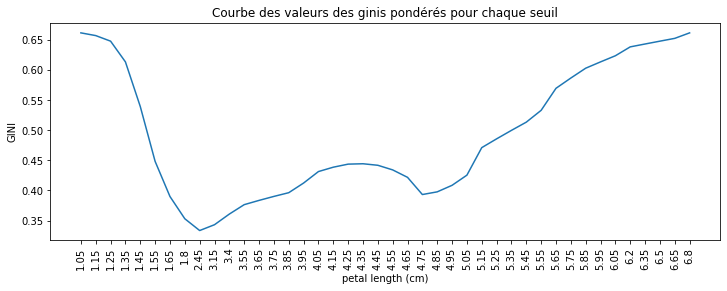

In [20]:
plt.figure(figsize=(12,4))
plt.plot([i[0] for i in liste_gini_pondere])
plt.xticks(ticks=range(len(liste_gini_pondere)),
           labels=[np.round(i[1],2) for i in liste_gini_pondere], 
           rotation='vertical')
plt.xlabel(iris.feature_names[2])
plt.ylabel('GINI');
plt.title('Courbe des valeurs des ginis pondérés pour chaque seuil');

On peut donc voir que le seuil optimal de séparation est : $2,45$. L'indice de Gini associé est inférieur à $0,35$. 

*Note : Cependant, il s'agit du meilleur seuil pour cette variable. Il faut donc itérer pour chacune des variables et chercher le meilleur split parmi l'ensemble des variables possibles (cela sera implémenté plus bas).*

#### Nouvel échantillon

Lorsque le meilleur split est trouvé, il faut maintenant retenir l'échantillon respectant le split du noeud et appliquer un nouvel embranchement avec le seuil optimal. La classification consistera à retenir la classe majoritaire au sein d'un noeud.

In [21]:
def sample_node_child(X, y, var, threshold, target_name):

    classe = X[var] < threshold

    m = len(y)
    number_left = sum(classe)
    number_right = sum(~classe)
    
    sample_left_count = {target_name[i]: sum(classe[y == i]) for i in np.unique(y)}
    sample_right_count = {target_name[i]: sum(~classe[y == i]) for i in np.unique(y)}

    sample_left = pd.concat(classe[y == i] for i in np.unique(y))
    sample_right = pd.concat(~classe[y == i] for i in np.unique(y))
    
    return (sample_left_count, sample_left), (sample_right_count, sample_right)

In [22]:
left, right = sample_node_child(X, y, "petal length (cm)", 2.45, iris.target_names)

> On peut afficher la répartition de chaque modalité pour ce split et les index des valeurs respectant cette répartition

In [23]:
left[0]

{'setosa': 50, 'versicolor': 0, 'virginica': 0}

In [24]:
left[1]

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: petal length (cm), Length: 150, dtype: bool

On peut créer une classe `Node` qui s'occupe de créer les noeuds fils : 

In [66]:
class Node:
    def __init__(self, X, y, var, threshold, target_name):

        classe = X[var] < threshold
        m = len(y)
        number_left = sum(classe)
        number_right = sum(~classe)

        self.threshold = threshold
        self.var = var

        left, right = self._sample_node_child(
            X, y, var, threshold, target_name, classe)

        self.sample_left = left[1]
        self.repartition_left = left[0]

        self.sample_right = right[1]
        self.repartition_right = right[0]

        self.gini_pondere = self._gini_node_child(X, y, var, threshold, classe,
                                                  m, number_left, number_right)

    def _sample_node_child(self, X, y, var, threshold, target_name, classe):
        """
        Recherche de la répartition et des indices des noeuds fils

        Paramètre 
        --------
        X : DataFrame des features (X)
        y : Série de la valeur à prédire (y)
        threshold : seuil de découpage en deux échantillons


        """

        sample_left_count = {target_name[i]: sum(
            classe[y == i]) for i in np.unique(y)}

        sample_right_count = {target_name[i]: sum(
            ~classe[y == i]) for i in np.unique(y)}

        sample_left = pd.concat(classe[y == i] for i in np.unique(y))
        sample_right = pd.concat(~classe[y == i] for i in np.unique(y))

        return (sample_left_count, sample_left), (sample_right_count, sample_right)

    def _gini_node_child(self, X, y, var, threshold, classe, m, number_left, number_right):
        """
        Calcul du gini pondéré entre les deux noeuds fils

        Paramètre
        --------
        X : DataFrame des features (X)
        y : Série de la valeur à prédire (y)
        threshold : seuil de découpage en deux échantillons

        """

        gini_left = 1.0 - sum((sum(classe[y == i]) / number_left) ** 2
                              for i in np.unique(y))
        gini_right = 1.0 - sum((sum(~classe[y == i]) / number_right) ** 2
                               for i in np.unique(y))

        gini_pondere = (number_left * gini_left +
                        number_right * gini_right) / m

        return gini_pondere

On a donc créer une classe `Node` qui prend pour paramètre en entrée les $X$, la variable $y$, un seuil et une variable. Lorsqu'elle est instanciée, elle contient comme atributs : 

>- le gini pondéré ; 
>- le seuil de split ;
>- la variable associé au seuil ;  
>- l'échantillon pour le noeud fils gauche et de droite ; 
>- la répartition de gauche et la réparition de droite des fils ;

#### Variable

La fonction suivante permet de trouver le meilleur embranchement possible (itération sur tous les seuils possibles pour chacune des variables)

In [26]:
def find_best_node(X, y, target_name):
    
    best_gini = _gini(y)
    node_parent = None

    for var in X.columns:

        all_value = np.unique(X[var])
        all_treshold = __make_threshold(all_value)

        if len(all_treshold) > 1:
            
            for threshold in all_treshold:
                node = Node(X, y, var, threshold, target_name)

                if node.gini_pondere < best_gini:
                    best_gini = node.gini_pondere
                    node_parent = node

    return node_parent

In [27]:
best_node = find_best_node(X,y, target_name=iris.target_names)

On peut afficher les informations du meilleur noeud de split : 

In [28]:
print(best_node.var)
print(best_node.threshold)

petal length (cm)
2.45


Et la répartition des noeuds fils : 

In [29]:
print(best_node.repartition_left)
print(best_node.repartition_right)

{'setosa': 50, 'versicolor': 0, 'virginica': 0}
{'setosa': 0, 'versicolor': 50, 'virginica': 50}


## Récursivité des noeuds 

La dernière étape de l'algorithme consiste à créer les noeuds de manière sucessive à partir des informations des noeuds fils.

In [60]:
max_depth = 2

In [61]:
def tree_growth(X, y, depth=0, target_name=None):

    if target_name is None:
        target_name = np.unique(y)

    classe_predict = target_name[y[y.idxmax()]]
    repartition_parent = dict(zip(target_name, y.value_counts(sort=False)))

    print('-' * 10)
    print("class : ", classe_predict)
    print("sample : ", repartition_parent)

    if depth < max_depth:
        node = find_best_node(X, y, target_name)

        if node is not None:

            X_left, y_left = X[node.sample_left], y[node.sample_left]
            X_right, y_right = X[node.sample_right], y[node.sample_right]

            print(node.var, "<=", node.threshold)
            print(node.repartition_left)
            print(node.repartition_right)
            node._left = tree_growth(X_left, y_left, depth + 1, target_name)
            node._right = tree_growth(X_right, y_right, depth + 1, target_name)

        return node
    

In [62]:
tree = tree_growth(X, y, target_name=iris.target_names)

----------
class :  virginica
sample :  {'setosa': 50, 'versicolor': 50, 'virginica': 50}
petal length (cm) <= 2.45
{'setosa': 50, 'versicolor': 0, 'virginica': 0}
{'setosa': 0, 'versicolor': 50, 'virginica': 50}
----------
class :  setosa
sample :  {'setosa': 50}
----------
class :  virginica
sample :  {'setosa': 50, 'versicolor': 50}
petal width (cm) <= 1.75
{'versicolor': 49, 'virginica': 5}
{'versicolor': 1, 'virginica': 45}
----------
class :  virginica
sample :  {'setosa': 49, 'versicolor': 5}
----------
class :  virginica
sample :  {'setosa': 1, 'versicolor': 45}


## C4.5

###  Métrique de split : le Gain d'information

Le Gain d'informations est basé sur la diminution de l'entropie après la division d'un ensemble de données sur un attribut. Construire un arbre de décision consiste donc à trouver un attribut qui renvoie le gain d'information le plus élevé (c'est-à-dire les branches les plus homogènes).

La première étape consiste donc à calculer l'entropie. Celle-ci mesure le désordre dans un systeme. On la calcule de la manière suivante : 

$$E(T) = \sum^{c}_{k=1} - \; \frac{s_k}{s} \; \log_2  \frac{s_k}{s}$$

où :

> $\frac{s_k}{s}$ : La proportion d'éléments de la classe $k$ dans l'échantillon $s$

Si l'échantillon est complètement homogène, l'entropie est égale à 0, de l'autre coté, si l'échantillon est équitablement répartit, l'entropie est égale à 1.

In [8]:
def _entropie_(y, normalize=False):
    n = y.size
    
    entropie = sum(-(sum(c == y) / n) * np.log2(sum(c == y) / n) 
     for c in np.unique(y))
    
    if normalize:
        n_classe = len(np.unique(y))
        return entropie / np.log2(n_classe)
    
    return entropie 

In [9]:
_entropie_(y)

1.584962500721156

On peut vérifier en utilisant le modèle d'arbre de sklearn : 

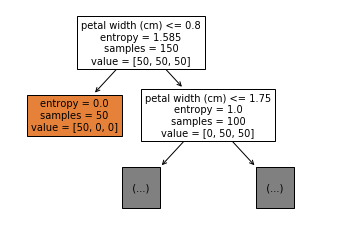

In [10]:
clf = DecisionTreeClassifier(criterion='entropy').fit(
    X,y)

plot_tree(clf, 
          feature_names=iris.feature_names,
          filled=True, max_depth=1);

Toutefois, cette entropie n'est pas comprise entre 0 et 1 (il y a plus que 2 classes à prédire). On peut donc normaliser avec : 

$$ E(T)_{normalize} = \frac{E}{\text{log}_2(n_{k})}$$

où : 
> $n_k$ : est le nombre de classes distinctes

> $E$ : est l'entropie non normalisé

In [11]:
_entropie_(y, normalize=True)

1.0

Pour construire l'arbre de décision, il est nécéssaire de calculer un second type *d'entropie* : il s'agit de **l'entropie conditionnelle à une variable**.

$$E(T|X) = \sum_{k=1}^{c} P(k) \; E(k)$$

> $P(k)$ : nombre de valeurs de l'échantillon répondant à la modalité de la variable (noté $k$) divisé par l'échantillon total : $\frac{s_k}{s}$

> $E(k)$ : entropie de l'échantillon pour la variable X pour chaque modalité $k$ 

*Note : Dans le cas d'une variable quantitative il faut itérer pour trouver le meilleur split (celui qui procure le plus de gain d'information)*



In [12]:
def _information_gain_(X, var, y, threshold):
    entropie = _entropie_(y)
    
    indice = X[var] <= threshold

    n_left = sum(indice) / len(y)
    n_right = sum(~indice) / len(y)

    e_left = _entropie_(y[indice])
    e_right = _entropie_(y[~indice])

    return entropie - ((n_left * e_left) + (n_right * e_right))

In [13]:
_information_gain_(X,"petal width (cm)", y, 0.8)

0.9182958340544894

L'entropie résultante est soustraite de l'entropie avant la split. Le résultat est le **gain d'information** ou la **diminution de l'entropie**.

Enfin, il faut choisir la variable avec le plus grand gain d'informations. On utilise ensuite cette partie du jeu de donnée respectant le split et on répète le même processus sur chaque branche.

### Embranchements 

On peut réitérer comme précédemment mais avec la mesure du gain d'information : 

- Pour le cas des **variables quantitatives** trouver le meilleur split binaires pour chacune des variables

- Pour le cas des **variables qualitatives non-ordinales**, on peut utiliser la méthode du one-hot encoding et prendre le seul $0,5$ comme critère de split, soit donner la possibilité de faire plusieurs split si la variable est qualitative mais encodé de manière ordinale. 



On doit trouver la variable et le seuil qui **maximise la gain d'information**.

In [79]:
class Node:
    def __init__(self, X, y, var, threshold, target_name):

        classe = X[var] < threshold
        m = len(y)
        number_left = sum(classe)
        number_right = sum(~classe)

        self.threshold = threshold
        self.var = var

        left, right = self._sample_node_child(
            X, y, var, threshold, target_name, classe)

        self.sample_left = left[1]
        self.repartition_left = left[0]

        self.sample_right = right[1]
        self.repartition_right = right[0]

        self.gain_information = self._information_gain_(
            X, y, var, threshold, classe)

    def _sample_node_child(self, X, y, var, threshold, target_name, classe):
        """
        Recherche de la répartition et des indices des noeuds fils

        Paramètre 
        --------
        X : DataFrame des features (X)
        y : Série de la valeur à prédire (y)
        threshold : seuil de découpage en deux échantillons


        """

        sample_left_count = {target_name[i]: sum(
            classe[y == i]) for i in np.unique(y)}

        sample_right_count = {target_name[i]: sum(
            ~classe[y == i]) for i in np.unique(y)}

        sample_left = pd.concat(classe[y == i] for i in np.unique(y))
        sample_right = pd.concat(~classe[y == i] for i in np.unique(y))

        return (sample_left_count, sample_left), (sample_right_count, sample_right)

    def _information_gain_(self, X, y, var, threshold, classe):
        entropie = self._entropie_(y)

        n_left = sum(classe) / len(y)
        n_right = sum(~classe) / len(y)

        e_left = _entropie_(y[classe])
        e_right = _entropie_(y[~classe])

        return entropie - ((n_left * e_left) + (n_right * e_right))

    def _entropie_(self, y, normalize=False):
        n = y.size

        entropie = sum(-(sum(c == y) / n) * np.log2(sum(c == y) / n)
                       for c in np.unique(y))

        if normalize:
            n_classe = len(np.unique(y))
            return entropie / np.log2(n_classe)

        return entropie

In [75]:
n = Node(X, y, 'petal width (cm)', 0.8, iris.target_names)

In [78]:
n.gain_information

0.9182958340544894

## Implémentation complète

La dernière étape consiste à implémenter l'ensemble avec les méthodes `fit` et `predict` : 

> pour voir l'implémentation finale : `%load CART.py`

On teste sur les données de cancer de sklearn

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from CART import DecisionTreeClassif

X = pd.DataFrame(cancer.data, columns=cancer.feature_names).iloc[:,:5]
y = pd.Series(cancer.target, name="y")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=1)

In [82]:
clf_cancer = DecisionTreeClassif(max_depth=4)
clf_cancer.fit(X_train, y_train, cancer.target_names)

In [83]:
sum(clf_cancer.predict(X_test) == cancer.target_names[y_test]) / len(y_test)

0.868421052631579

Pour observer les embranchements de l'arbre, il faut naviguer dans les attributs de l'objet `clf`. Par exemple pour le premier embranchement : 

In [37]:
clf_cancer.tree.node.repartition_left, clf_cancer.tree.node.repartition_right

({'malignant': 6, 'benign': 132}, {'malignant': 79, 'benign': 10})

Si on utilise comme critère le gain d'information : 

In [3]:
clf_cancer = DecisionTreeClassif(criterion='entropy', max_depth=3)
clf_cancer.fit(X_train,y_train, cancer.target_names)

In [4]:
sum(clf_cancer.predict(X_test) == cancer.target_names[y_test]) / len(y_test)

0.8654970760233918

In [9]:
clf_cancer.tree.node.repartition_left, clf_cancer.tree.node.repartition_right

({'malignant': 6, 'benign': 132}, {'malignant': 79, 'benign': 10})

In [67]:
clf_cancer.tree.node.gain_information

0.5983933678272204

## CHAID

## Avec Scikit-Learn

### CART

In [17]:
clf = DecisionTreeClassifier(max_depth=4, random_state=100)
clf.fit(X_train,y_train);

In [18]:
pred_sk = clf.predict(X_test)

In [19]:
sum(y_test == pred_sk) / len(y_test)

0.868421052631579

L'API scikit-learn permet de visualiser l'arbre avec un objet matplotlib : 

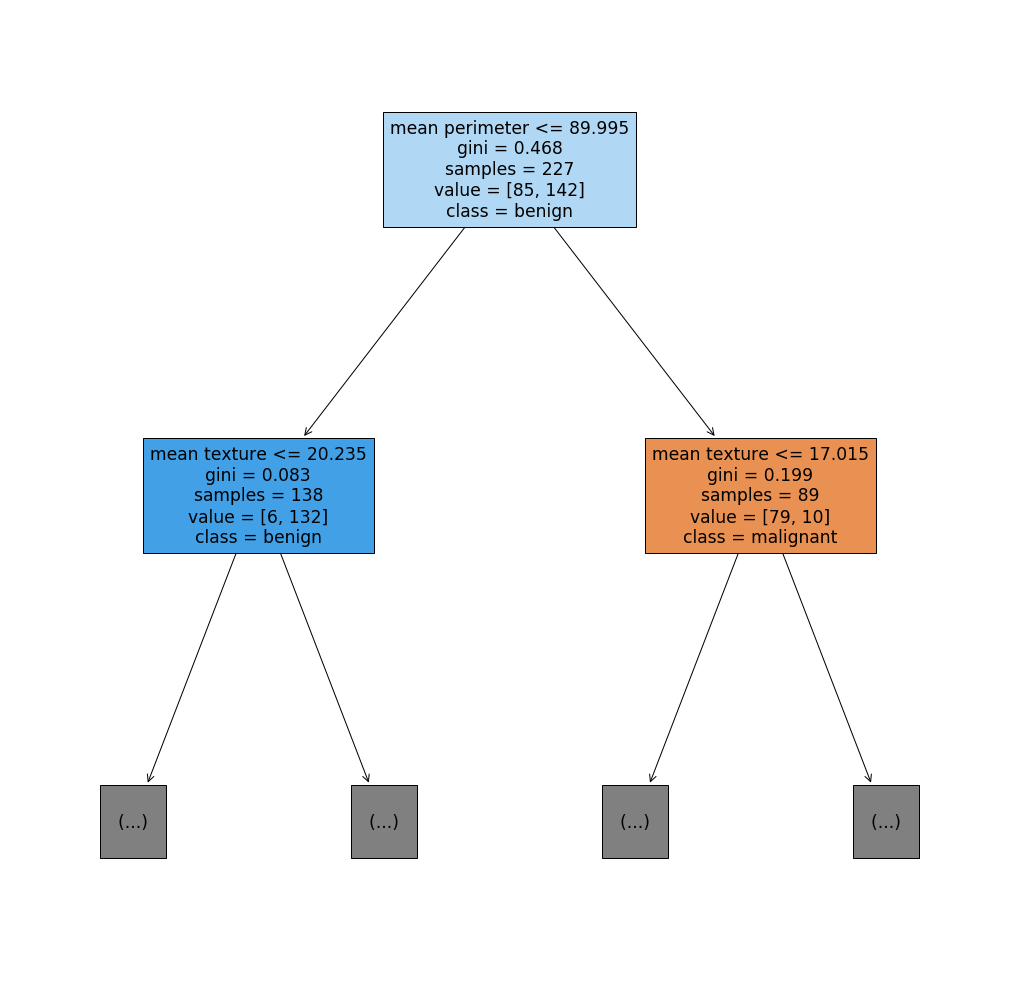

In [20]:
plt.figure(figsize=(18,18))
plot_tree(clf, feature_names=cancer.feature_names, 
          class_names=cancer.target_names,
         filled=True, max_depth=1);

- **Seuil** : on peut lire le nom de la variable discriminante et sa valeur (pour notre cas précédent avec les fleurs d'iris, il s'agit de la longueur de la pétale qui est inférieur à 2,35 cm).
- **Gini** : le coefficient de GINI du noeud parent
- **Samples** : fait référence à la taille de l'échantillon
- **Value** : fait référence à la taille de l'échantilllon pour chacune des classes.
- **Class** : fait référence à la classe majoritaire lors de cette embranchement.

### C4.5

In [12]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=100)
clf.fit(X_train,y_train);

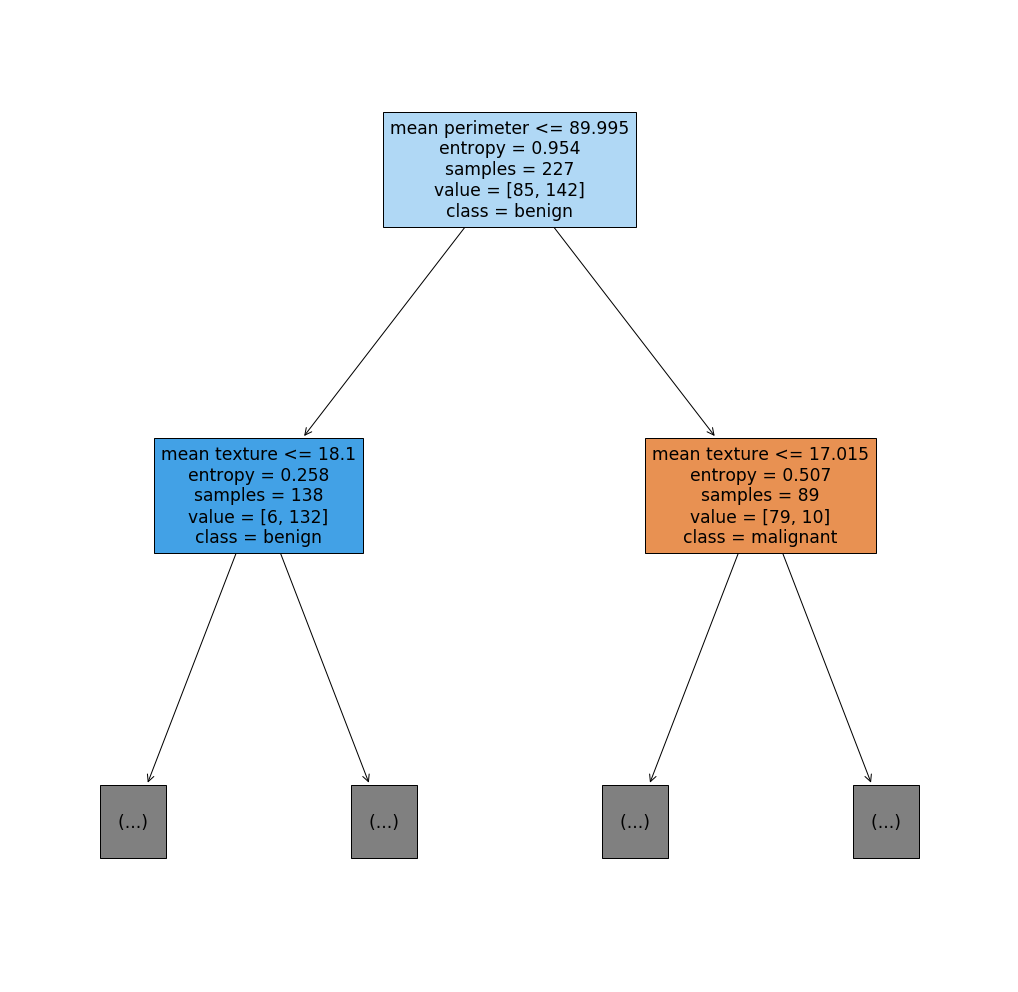

In [13]:
plt.figure(figsize=(18,18))
plot_tree(clf, feature_names=cancer.feature_names, 
          class_names=cancer.target_names,
         filled=True, max_depth=1);

# Arbre de Décision : Régression

La réduction de la variance est un algorithme utilisé pour les variables cibles continues (problèmes de régression). La répartition avec la variance la plus faible est sélectionnée comme critère de répartition de l'échantillon.

In [63]:
y_train.var(ddof=0)

83.24820115674933

In [65]:
y_train[(X_train.LSTAT <= 7.28)].var(ddof=0)

70.48996831145315

- Calcul de la variance pour chaque noeud.
- Calcul de la variance moyenne pondérée entre les deux splits
- Retenir la baisse de variance la plus élevée

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
from sklearn.datasets import load_boston

In [24]:
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name="y")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=1)

In [29]:
rgs = DecisionTreeRegressor().fit(X_train,y_train)

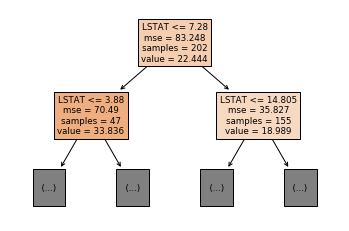

In [34]:
plot_tree(rgs, filled=True, 
          feature_names=boston.feature_names, max_depth=1);

# Référence 

- [TowardsDataScience, Decision Tree from scratch in python](https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775)
- [Medium, Decision Tree it Begin Here](https://medium.com/@rishabhjain_22692/decision-trees-it-begins-here-93ff54ef134)